# Visualization

I'm convinced you should focus on

- Line plots
- Scatter plots
- Bar plots
- Histograms

After you master these, you can move on to more advanced plots


## Line Plots

Plot NVidia vs SP500



In [2]:
# Getting the data
import pandas as pd
import yfinance as yf

nvda = yf.Ticker("NVDA")
nvda_hist = nvda.history(period="10y")
spy = yf.Ticker("SPY")
spy_hist = spy.history(period="10y")

(pd.concat([nvda_hist.assign(ticker='NVDA'),
            spy_hist.assign(ticker='SPY')])
            .sort_index()
            .to_csv('nvda_spy.csv')
 )

Failed to get ticker 'NVDA' reason: HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x12f2dd2a0>: Failed to establish a new connection: [Errno 61] Connection refused'))
$NVDA: possibly delisted; no price data found  (period=10y)
Failed to get ticker 'SPY' reason: HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x12ed2fb20>: Failed to establish a new connection: [Errno 61] Connection refused'))
$SPY: possibly delisted; no price data found  (period=10y)


In [7]:
# Load the data
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/refs/heads/master/data/nvda_spy.csv'
raw = pd.read_csv(url, parse_dates=['Date'])
raw

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Capital Gains
0,2014-10-27 00:00:00-04:00,0.441464,0.443615,0.436684,0.441942,145092000,0.0,0.0,NVDA,NaN
1,2014-10-27 00:00:00-04:00,164.091207,164.694823,163.504361,164.451706,82954000,0.0,0.0,SPY,0.0
2,2014-10-28 00:00:00-04:00,165.005031,166.346392,164.929570,166.338013,106736000,0.0,0.0,SPY,0.0
3,2014-10-28 00:00:00-04:00,0.440747,0.452937,0.440269,0.452459,192580000,0.0,0.0,NVDA,NaN
4,2014-10-29 00:00:00-04:00,0.450546,0.453176,0.445527,0.449590,168340000,0.0,0.0,NVDA,NaN
...,...,...,...,...,...,...,...,...,...,...
5029,2024-10-23 00:00:00-04:00,142.029999,142.429993,137.460007,139.559998,285930000,0.0,0.0,NVDA,NaN
5030,2024-10-24 00:00:00-04:00,579.979980,580.059998,576.570007,579.239990,34979900,0.0,0.0,SPY,0.0
5031,2024-10-24 00:00:00-04:00,140.820007,141.350006,138.460007,140.410004,172354900,0.0,0.0,NVDA,NaN
5032,2024-10-25 00:00:00-04:00,140.940002,144.059998,140.800003,141.539993,203385650,0.0,0.0,NVDA,NaN


In [8]:
## prep data
(raw
 .pivot(index='Date', columns='ticker', values='Close')
)

ticker,NVDA,SPY
Date,,
2014-10-27 00:00:00-04:00,0.441942,164.451706
2014-10-28 00:00:00-04:00,0.452459,166.338013
2014-10-29 00:00:00-04:00,0.449590,166.086472
2014-10-30 00:00:00-04:00,0.446722,167.151169
2014-10-31 00:00:00-04:00,0.467039,169.062576
...,...,...
2024-10-21 00:00:00-04:00,143.710007,583.630005
2024-10-22 00:00:00-04:00,143.589996,583.320007
2024-10-23 00:00:00-04:00,139.559998,577.989990


<AxesSubplot: xlabel='Date'>

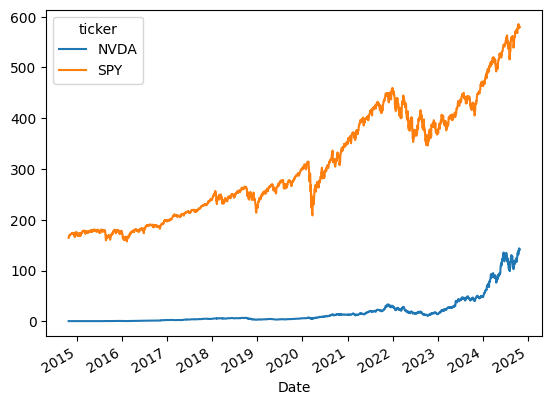

In [9]:
## prep data
(raw
 .pivot(index='Date', columns='ticker', values='Close')
 .plot()
)

In [10]:
# compare the returns
# the previous plot is hard to compare, so we can compare the returns

def calc_return(df, col):
    return (df
            [col]
            .pct_change()
            .add(1)
            .cumprod()
    )

(raw
 .pivot(index='Date', columns='ticker', values='Close')
 .assign(nvda_return=lambda x: calc_return(x, 'NVDA'),
         spy_return=lambda x: calc_return(x, 'SPY'))
 #.plot()
)

ticker,NVDA,SPY,nvda_return,spy_return
Date,,,,
2014-10-27 00:00:00-04:00,0.441942,164.451706,NaN,NaN
2014-10-28 00:00:00-04:00,0.452459,166.338013,1.023797,1.011470
2014-10-29 00:00:00-04:00,0.449590,166.086472,1.017307,1.009941
2014-10-30 00:00:00-04:00,0.446722,167.151169,1.010816,1.016415
2014-10-31 00:00:00-04:00,0.467039,169.062576,1.056788,1.028038
...,...,...,...,...
2024-10-21 00:00:00-04:00,143.710007,583.630005,325.178515,3.548945
2024-10-22 00:00:00-04:00,143.589996,583.320007,324.906963,3.547060
2024-10-23 00:00:00-04:00,139.559998,577.989990,315.788120,3.514649


<AxesSubplot: xlabel='Date'>

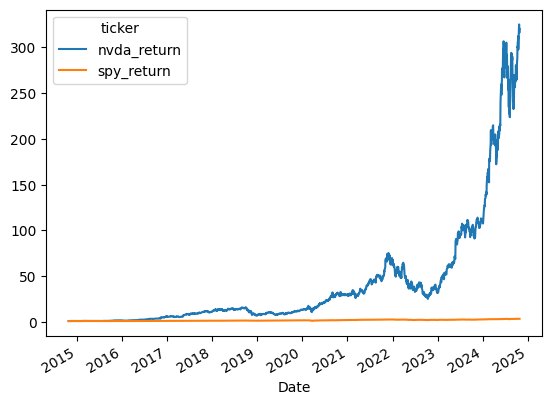

In [11]:
# compare the returns
# the previous plot is hard to compare, so we can compare the returns

def calc_return(df, col):
    return (df
            [col]
            .pct_change()
            .add(1)
            .cumprod()
    )

(raw
 .pivot(index='Date', columns='ticker', values='Close')
 .assign(nvda_return=lambda x: calc_return(x, 'NVDA'),
         spy_return=lambda x: calc_return(x, 'SPY'))
 .plot(y=['nvda_return', 'spy_return'])
)

<AxesSubplot: xlabel='Date'>

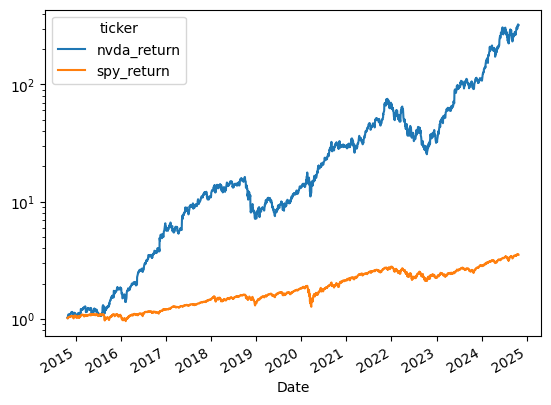

In [12]:
# compare the returns
# the previous plot is hard to compare, so we can compare the returns

def calc_return(df, col):
    return (df
            [col]
            .pct_change()
            .add(1)
            .cumprod()
    )

(raw
 .pivot(index='Date', columns='ticker', values='Close')
 .assign(nvda_return=lambda x: calc_return(x, 'NVDA'),
         spy_return=lambda x: calc_return(x, 'SPY'))
 .plot(y=['nvda_return', 'spy_return'], logy=True)
)

### Making it Pretty

Text(0.0, 0.0, 'Source: Yahoo Finance')

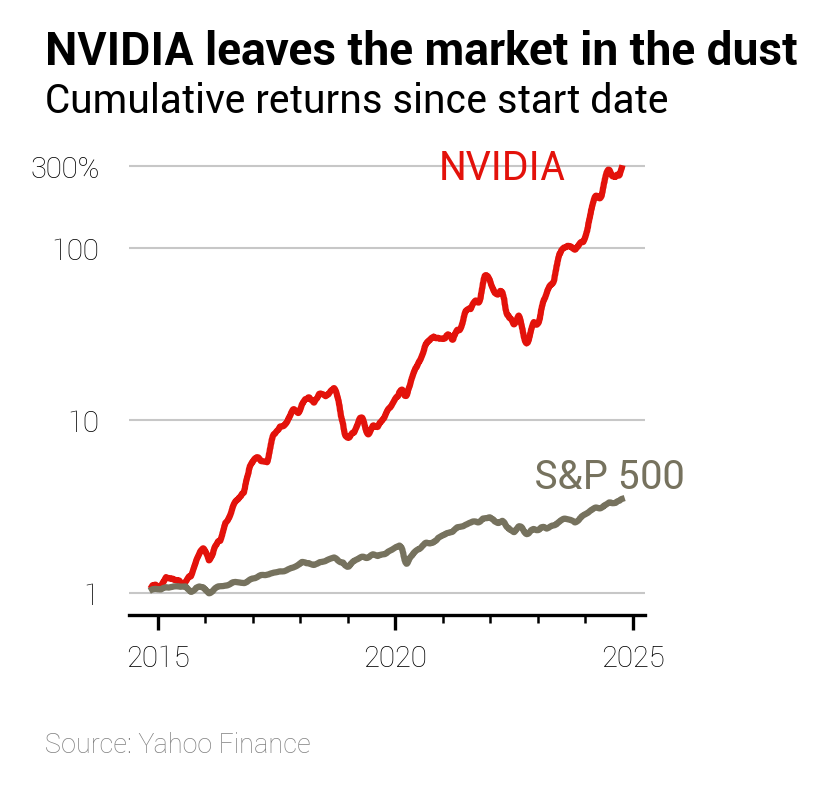

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd

# Define colors and font for "Economist-style" aesthetics
# https://design-system.economist.com/documents/CHARTstyleguide_20170505.pdf
colors = ['#e3120b', '#76725e']
plt.rcParams["font.family"] = "Roboto"
figsize = (160, 165) # pts
def points_to_inches(points):
    return points / 72

figsize_inches = [points_to_inches(dim) for dim in figsize]

padding = 6 # pts
heading_fontsize = 11
heading_fontweight = 'bold'
subheading_fontsize = 9.5
subheading_fontweight = 'normal'
source_fontsize = 6.5
source_fontweight = 'light'

axis_fontsize = 7.5
axis_fontweight = 'normal'
tick_fontsize = 7
tick_fontweight = 'light'


# Define cumulative return calculation function
def calc_returns(df_, col):
    return (df_[col]
            .pct_change()
            .add(1)
            .cumprod()
           )

# Assuming 'raw' is your DataFrame with Date, ticker, and Close columns
# Process data to calculate cumulative returns and relative return
plot_data = (raw
    .set_index(['Date', 'ticker'])['Close']
    .unstack()
    .assign(nvda_return=lambda df_: calc_returns(df_, 'NVDA'),
            spy_return=lambda df_: calc_returns(df_, 'SPY'))
    .rolling(window=28, center=True)
        .mean()
)

# Create the plot
fig, ax = plt.subplots(figsize=figsize_inches, dpi=300)

# Plot the cumulative returns for NVIDIA and SPY
plot_data.plot(y=['nvda_return', 'spy_return'], color=colors, linewidth=1.5, 
               ax=ax, legend=False, 
               logy=True
               )

# Customize plot titles

plt.figtext(0.0 , 1, 'NVIDIA leaves the market in the dust', ha='left', # transform=ax.transAxes, 
            fontsize=heading_fontsize, fontweight=heading_fontweight)
#ax.text(0, 0.95, 'Cumulative returns since start date', transform=ax.transAxes, 
plt.figtext(0, 0.93, 'Cumulative returns since start date', #transform=ax.transAxes, 
        fontsize=subheading_fontsize, fontweight=subheading_fontweight)

# Customize x-axis ticks and labels
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Major ticks every 5 years
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format x-axis labels as years
ax.set_xticks(minor=True, ticks=[mdates.datestr2num(f'{year}-01-01') 
        for year in range(2015, 2026, 1)])  # Minor ticks every year

# set rotation of x-axis labels to 0
for label in ax.get_xticklabels():
        label.set_rotation(0)
        label.set_ha('center')
        label.set_fontsize(tick_fontsize)
        label.set_fontweight(tick_fontweight)
ax.set_xlabel('')  # Clear x-axis label


# Customize y-axis ticks and labels
# for logy ticks
pos_ticks = [0, 100, 200, 300]
pos_ticks = [1, 10, 100, 300]
ax.set_yticks(ticks=pos_ticks)
ax.set_yticklabels([f'{label}%' if label == 300 else f'{label}' for label in pos_ticks])
for label in ax.get_yticklabels():
        label.set_fontsize(tick_fontsize)
        label.set_fontweight(tick_fontweight)

# Hide major y-axis ticks
ax.tick_params(left=False)
# Hide minor y-axis ticks
ax.tick_params(axis='y', which='minor', left=False)


# Label each line with its respective asset name
for label, pos, color in zip(['NVIDIA', 'S&P 500'], 
        [(datetime.datetime(2020, 12, 1), 250), (datetime.datetime(2022,12, 1), 4)], colors):
    ax.text(pos[0], pos[1], label, color=color, ha='left', 
            fontsize=subheading_fontsize, fontweight=subheading_fontweight)

# Hide grid on x-axis and y-axis grid lines
plt.grid(axis='y', linestyle='-', alpha=0.7, linewidth=.5)
#ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide top, left, and right borders, and x-axis label
[ax.spines[side].set_visible(False) for side in ['top', 'left', 'right']]

# Add source text at the bottom
plt.figtext(0.00, 0.00, 'Source: Yahoo Finance', ha='left', 
            fontsize=source_fontsize, fontweight=source_fontweight,
            color='gray')

## Scatter Plots

<img src='https://pbs.twimg.com/media/GIAcQZSWoAEy-9v?format=jpg&name=medium' width=300>

In [14]:
## Get the data

import pandas as pd

url = 'http://atmenv.envi.osakafu-u.ac.jp/omu-content/uploads/sites/1215/2015/10/KyotoFullFlower7.xls'
cherry_raw = pd.read_excel(url, skiprows=25, dtype_backend='pyarrow')
cherry_raw

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,<NA>,<NA>,<NA>,<NA>,-
1,802,<NA>,<NA>,<NA>,<NA>,-
2,803,<NA>,<NA>,<NA>,<NA>,-
3,804,<NA>,<NA>,<NA>,<NA>,-
4,805,<NA>,<NA>,<NA>,<NA>,-
...,...,...,...,...,...,...
1210,2011,99,409,8,0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101,410,8,0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93,403,8,0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94,404,8,0,NEWS-PAPER(ARASHIYAMA)


In [15]:
def tweak_cherry(df):
    return (df
            .rename(columns={'AD': 'year',
                             'Full-flowering date (DOY)': 'flowering_doy',
                             'Full-flowering date': 'flowering_MDD'})
            .assign(
              month=lambda df_: df_['flowering_MDD']//100,
              day=lambda df_: df_['flowering_MDD'] - (df_['month'] *100),
            )
           )

tweak_cherry(cherry_raw)

,year,flowering_doy,flowering_MDD,Source code,Data type code,Reference Name,month,day
0,801,<NA>,<NA>,<NA>,<NA>,-,<NA>,<NA>
1,802,<NA>,<NA>,<NA>,<NA>,-,<NA>,<NA>
2,803,<NA>,<NA>,<NA>,<NA>,-,<NA>,<NA>
3,804,<NA>,<NA>,<NA>,<NA>,-,<NA>,<NA>
4,805,<NA>,<NA>,<NA>,<NA>,-,<NA>,<NA>
...,...,...,...,...,...,...,...,...
1210,2011,99,409,8,0,NEWS-PAPER(ARASHIYAMA),4,9
1211,2012,101,410,8,0,NEWS-PAPER(ARASHIYAMA),4,10
1212,2013,93,403,8,0,NEWS-PAPER(ARASHIYAMA),4,3
1213,2014,94,404,8,0,NEWS-PAPER(ARASHIYAMA),4,4


<AxesSubplot: xlabel='year', ylabel='flowering_doy'>

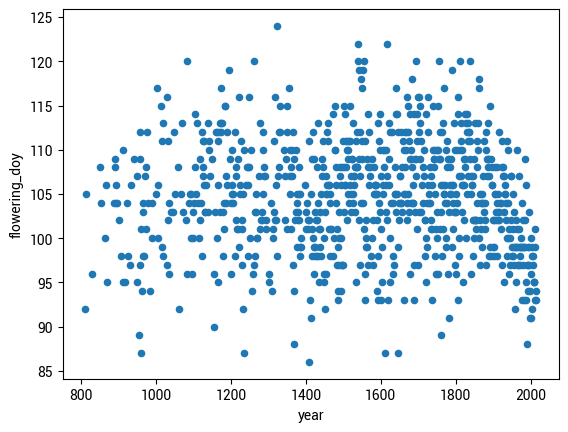

In [16]:
(tweak_cherry(cherry_raw)
 .plot(x='year', y='flowering_doy', kind='scatter')
)

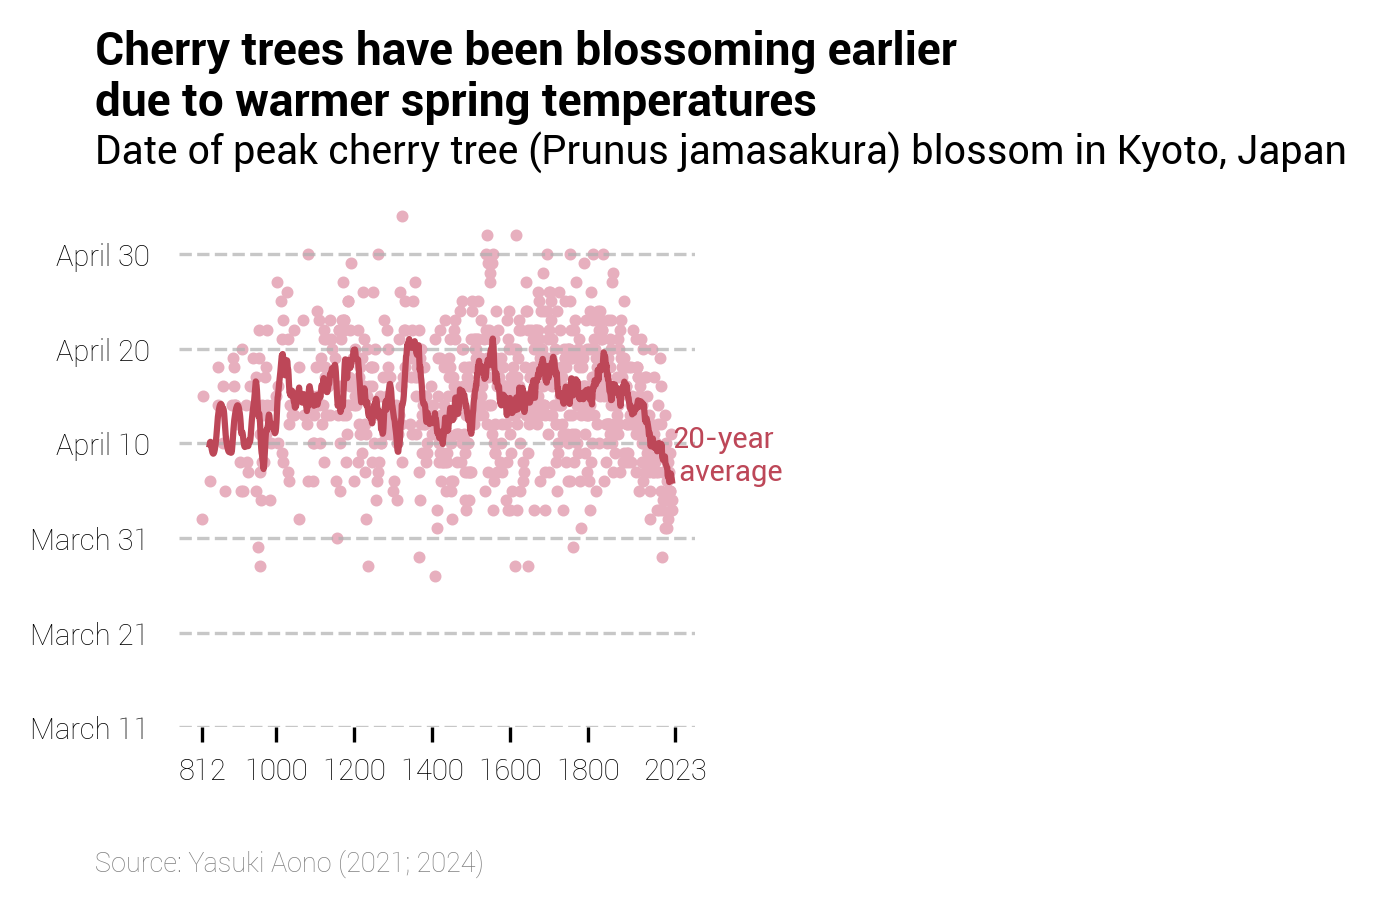

In [40]:
import matplotlib.pyplot as plt

def plot_cherry(df):
    plt.rcParams["font.family"] = "Roboto"
    figsize = (160, 165) # pts
    def points_to_inches(points):
        return points / 72

    figsize_inches = [points_to_inches(dim) for dim in figsize]

    padding = 6 # pts
    heading_fontsize = 11
    heading_fontweight = 'bold'
    subheading_fontsize = 9.5
    subheading_fontweight = 'normal'
    source_fontsize = 6.5
    source_fontweight = 'light'

    axis_fontsize = 7.5
    axis_fontweight = 'normal'
    tick_fontsize = 7
    tick_fontweight = 'light'

    fig, ax = plt.subplots(figsize=figsize_inches, dpi=300)
    df.plot.scatter(x='year', y='flowering_doy', ax=ax, c='#e7afbe',
                    s=3.5)
    df.plot(x='year', y='rolling', ax=ax, c='#bd4758', linewidth=1.5)
    # add label color of line to end of line
    ax.text(df['year'].iloc[-1], df['rolling'].iloc[-1], '20-year\n average', color='#bd4758',
                            fontsize=tick_fontsize, fontweight='normal')

    # set title
    plt.figtext(0.0 , 1, 'Cherry trees have been blossoming earlier\ndue to warmer spring temperatures', ha='left', 
                fontsize=heading_fontsize, fontweight=heading_fontweight)
    # set subtitle
    plt.figtext(0, 0.93, 'Date of peak cherry tree (Prunus jamasakura) blossom in Kyoto, Japan',
                fontsize=subheading_fontsize, fontweight=subheading_fontweight)
    # get rid of the spines
    for spine in ax.spines.values():
        spine.set_visible(False)
    # get rid of y-axis ticks
    ax.tick_params(axis='y', which='both', left=False)
    # set font size and weight for x-axis labels
    for label in ax.get_xticklabels():
        label.set_fontsize(tick_fontsize)
        label.set_fontweight(tick_fontweight)
    for label in ax.get_yticklabels():
        label.set_fontsize(tick_fontsize)
        label.set_fontweight(tick_fontweight)
    # set ticks at location/labels
    # [(70, 'March 11'), (80, 'March 21'), (90, 'March 31'), (100, 'April 10'), (110, 'April 20'), (120, 'April 30')],
    ax.set_yticks([70, 80, 90, 100, 110, 120])
    ax.set_yticklabels(['March 11', 'March 21', 'March 31', 'April 10', 'April 20', 'April 30'])
    # add dashed grid to y-axis
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # set x ticks to 812, 1000, 1200, 1400, 1600, 1800, 2023
    ax.set_xticks([812, 1000, 1200, 1400, 1600, 1800, 2023])
    # get rid of x and y axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # add source text at the bottom
    plt.figtext(0.00, -0.10, 'Source: Yasuki Aono (2021; 2024)', ha='left', 
                fontsize=source_fontsize, fontweight=source_fontweight,
                color='gray')
    # hide legend
    ax.legend().set_visible(False)

    #ax.legend()
    plt.show()

(tweak_cherry(cherry_raw)
 .assign(rolling=lambda df_: df_['flowering_doy'].interpolate().rolling(window=20).mean())
 .pipe(plot_cherry)
)

## Bar Plot

Goal: Compare F150 mpg over years

In [19]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/refs/heads/master/data/vehicles.csv.zip'
raw_mpg = pd.read_csv(url)
raw_mpg

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_55580/360337955.py:3: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_mpg = pd.read_csv(url)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
41140,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
41141,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
41142,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


<AxesSubplot: xlabel='year'>

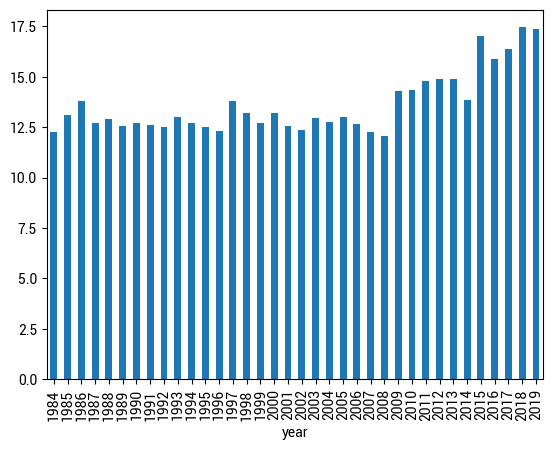

In [21]:
# bar plots go great with groupby!
(raw_mpg
 .query('model.str.contains("F150")')
 .groupby('year')
 .city08
 .mean()
 .plot.bar()
)

[1980. 1990. 2000. 2010. 2020. 2030.]


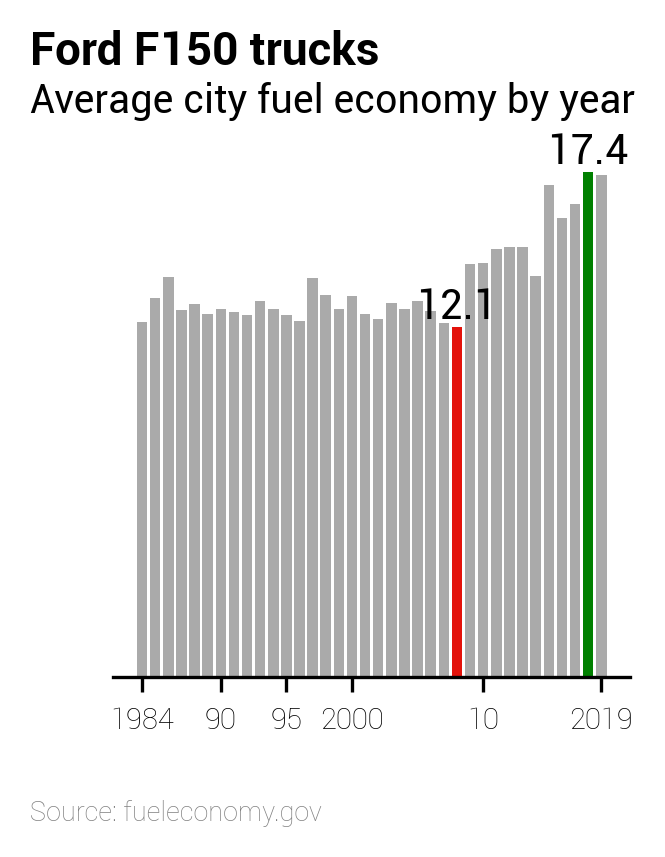

In [24]:
def plot_mpg(df_):
    plt.rcParams["font.family"] = "Roboto"
    figsize = (160, 165) # pts
    def points_to_inches(points):
        return points / 72

    figsize_inches = [points_to_inches(dim) for dim in figsize]

    padding = 6 # pts
    heading_fontsize = 11
    heading_fontweight = 'bold'
    subheading_fontsize = 9.5
    subheading_fontweight = 'normal'
    source_fontsize = 6.5
    source_fontweight = 'light'

    axis_fontsize = 7.5
    axis_fontweight = 'normal'
    tick_fontsize = 7
    tick_fontweight = 'light'

    grey = '#aaaaaa'
    red = '#e3120b'
    green = '#008000'

    fig, ax = plt.subplots(figsize=figsize_inches, dpi=300)
    data = (df_
     .groupby('year')   
        .city08
        .mean()
        #.plot.bar(ax=ax)
    )

    max_index = data.idxmax()
    min_index = data.idxmin()
    
    colors = [red if x == min_index else green if x == max_index else grey for x in data.index]

    # pandas converts the x-axis to categorical (which is annoying)
    plt.bar(data.index, data.values, color=colors)

    # label minimum and maximum
    ax.text(min_index, data.loc[min_index], 
            f'{data[min_index]:0.1f}', ha='center', va='bottom', color='black')
    ax.text(max_index, data.loc[max_index],
            f'{data[max_index]:0.1f}', ha='center', va='bottom', color='black')

    # set title
    plt.figtext(0.0 , 1, 'Ford F150 trucks', ha='left', 
                fontsize=heading_fontsize, fontweight=heading_fontweight)
    
    # set subtitle
    plt.figtext(0, 0.93, 'Average city fuel economy by year', ha='left', 
                fontsize=subheading_fontsize, fontweight=subheading_fontweight)
    
    # keep bottom spine
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.spines['bottom'].set_visible(True)

    print(ax.get_xticks())
    # set x ticks and labels to 1984, 90, 95, 2000, 10, 2019
    ax.set_xticks([1984, 1990, 1995, 2000, 2010, 2019])
    ax.set_xticklabels(['1984', '90', '95', '2000', '10', '2019'])
    # set x-axis font size and weight
    for label in ax.get_xticklabels():
        label.set_fontsize(tick_fontsize)
        label.set_fontweight(tick_fontweight)

    # get rid of y-axis ticks
    ax.tick_params(axis='y', which='both', left=False)
    ax.set_yticks([])
    # get rid of y-axis label

    # set y-axis font size and weight
    for label in ax.get_yticklabels():
        label.set_fontsize(tick_fontsize)
        label.set_fontweight(tick_fontweight)

    # add source text at the bottom
    plt.figtext(0.00, -0.10, 'Source: fueleconomy.gov', ha='left', 
                fontsize=source_fontsize, fontweight=source_fontweight,
                color='gray')


(raw_mpg
 .query('model.str.contains("F150")')
 .pipe(plot_mpg)
)

## Histogram

Specialized bar plot for continuous data.

Goal: Distribution of ages for olympic athletes

<img src='https://pbs.twimg.com/media/GUY_1J2W0AAhb6g?format=jpg&name=large' width='300'>

In [29]:
url = 'https://github.com/mattharrison/datasets/raw/refs/heads/master/data/athlete_events.csv.zip'
olym_raw = pd.read_csv(url)
olym_raw

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


<AxesSubplot: ylabel='Frequency'>

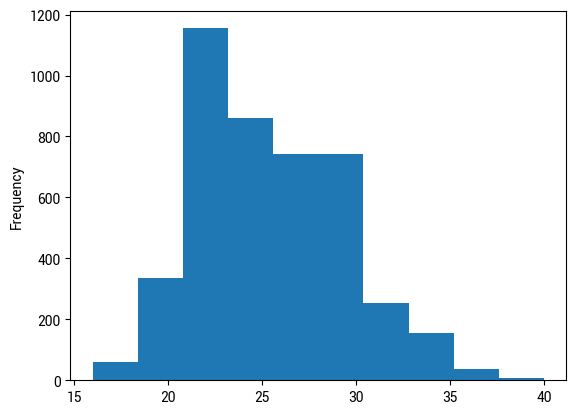

In [30]:
(olym_raw
 .query('Sport == "Basketball"')
 .Age
 .plot.hist()
)

<AxesSubplot: ylabel='Frequency'>

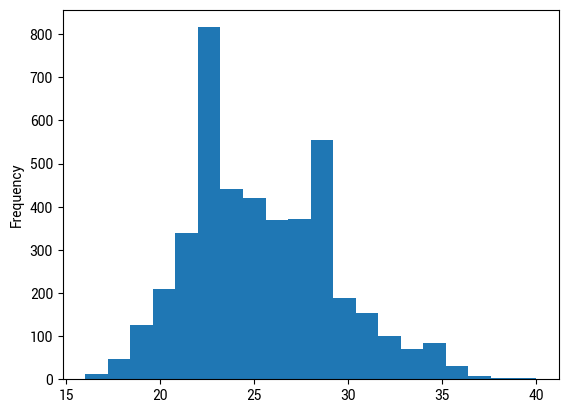

In [31]:
(olym_raw
 .query('Sport == "Basketball"')
 .Age
 .plot.hist(bins=20)
)

<AxesSubplot: ylabel='Frequency'>

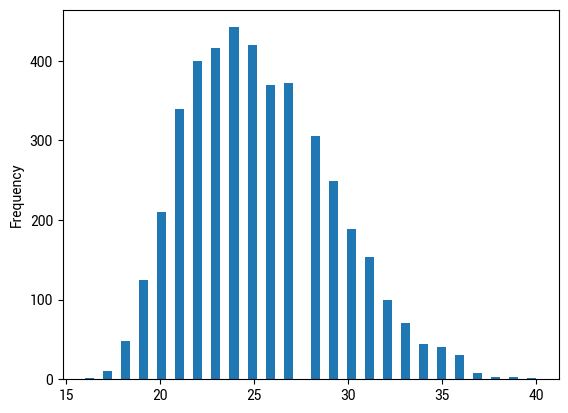

In [32]:
(olym_raw
 .query('Sport == "Basketball"')
 .Age
 .plot.hist(bins=50)
)

In [33]:
(olym_raw
  .query('Sport == "Basketball"')
  .describe())

,ID,Age,Height,Weight,Year
count,4536.000000,4350.000000,3881.000000,3678.000000,4536.000000
mean,66967.785494,25.324598,190.869879,85.777053,1981.830688
std,39076.925471,3.881247,11.459243,14.817590,23.233772
min,1.000000,16.000000,161.000000,50.000000,1936.000000
25%,31726.000000,22.000000,183.000000,75.000000,1960.000000
50%,68185.000000,25.000000,190.000000,85.000000,1984.000000
75%,100193.000000,28.000000,198.000000,95.000000,2004.000000
max,135568.000000,40.000000,226.000000,156.000000,2016.000000


<AxesSubplot: ylabel='Frequency'>

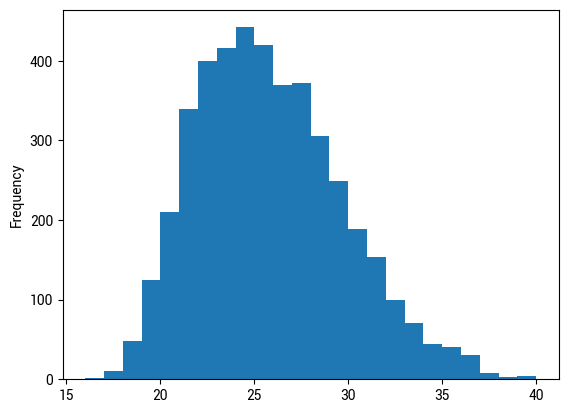

In [34]:
(olym_raw
 .query('Sport == "Basketball"')
 .Age
 .plot.hist(bins=24)
)

Medal
Bronze    AxesSubplot(0.125,0.11;0.775x0.77)
Gold      AxesSubplot(0.125,0.11;0.775x0.77)
Silver    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

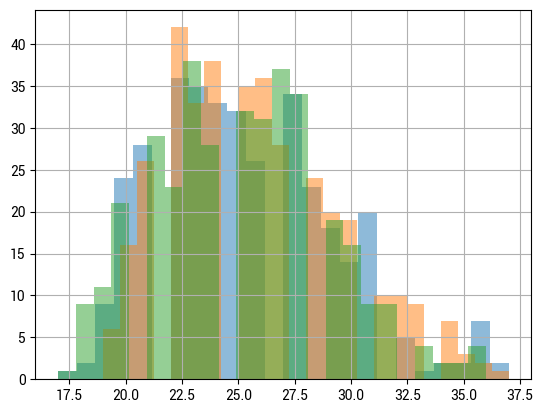

In [35]:
(olym_raw
 .query('Sport == "Basketball"')
 .groupby('Medal')
 .Age
 .hist(alpha=0.5, bins=24)

)

In [36]:
(olym_raw
 .query('Sport == "Basketball"')
 .pipe(lambda df_: pd.crosstab(df_.Age, df_.Medal))
 .loc[:, ['Gold', 'Silver', 'Bronze']]
)

Medal,Gold,Silver,Bronze
Age,,,
17.0,0,1,1
18.0,0,9,2
19.0,6,11,9
20.0,16,21,24
21.0,26,29,28
22.0,42,23,36
23.0,33,38,35
24.0,38,28,33
25.0,35,32,32


<AxesSubplot: xlabel='Age'>

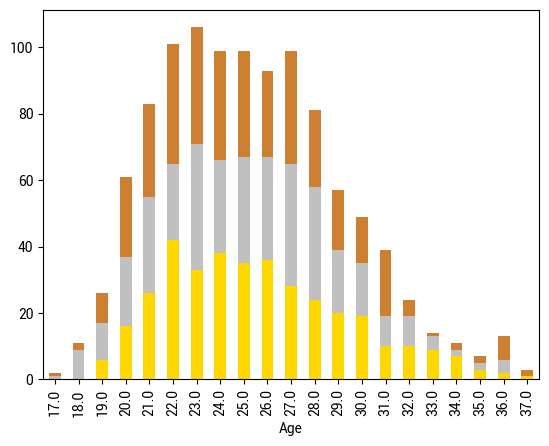

In [37]:
(olym_raw
    .query('Sport == "Basketball"')
    .pipe(lambda df_: pd.crosstab(df_.Age, df_.Medal))
    .loc[:, ['Gold', 'Silver', 'Bronze']]
    .plot.bar(stacked=True, color=['#FFD700', '#C0C0C0', '#CD7F32'], legend=False)
    )
    

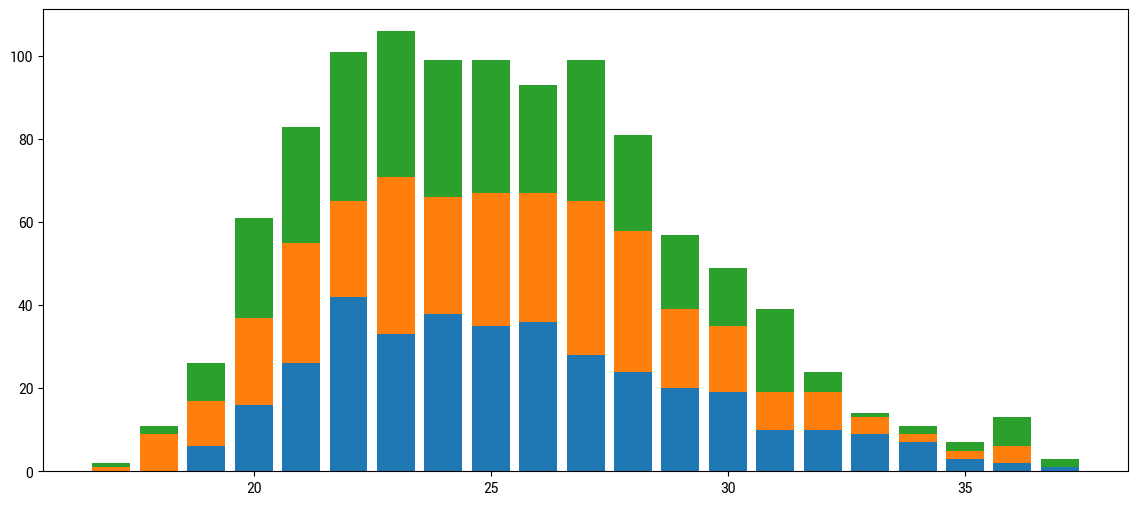

In [38]:
def stacked_bar(df_):
    cumsum = df_.cumsum(axis='columns')
    fig, ax = plt.subplots(figsize=(14,6))
    bottom = [0] * len(df_)
    for col in df_.columns:
        ax.bar(df_.index, df_[col], bottom=bottom, label=col)
        bottom = cumsum[col]



# use ax.bar to stack
# need to cumsum the values along the columns
(olym_raw
    .query('Sport == "Basketball"')
    .pipe(lambda df_: pd.crosstab(df_.Age, df_.Medal))
    .loc[:, ['Gold', 'Silver', 'Bronze']]
    .pipe(stacked_bar)
    )

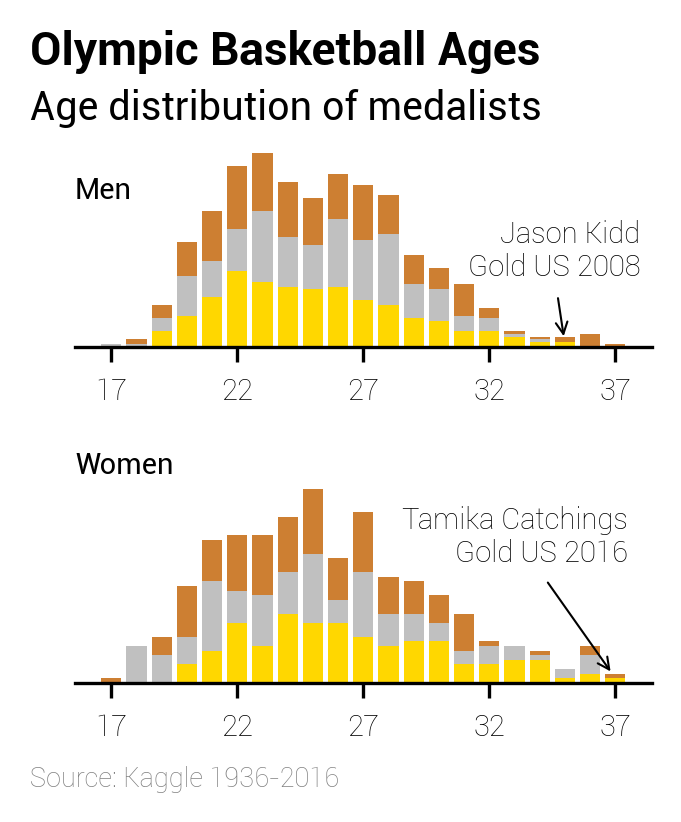

In [39]:
def plot_medals(df_, sport):
    plt.rcParams["font.family"] = "Roboto"
    figsize = (160, 165) # pts
    def points_to_inches(points):
        return points / 72

    figsize_inches = [points_to_inches(dim) for dim in figsize]

    padding = 6 # pts
    heading_fontsize = 11
    heading_fontweight = 'bold'
    subheading_fontsize = 9.5
    subheading_fontweight = 'normal'
    source_fontsize = 6.5
    source_fontweight = 'light'

    axis_fontsize = 7.5
    axis_fontweight = 'normal'
    tick_fontsize = 7
    tick_fontweight = 'light'

    grey = '#aaaaaa'
    red = '#e3120b'
    green = '#008000'

    fig, axs = plt.subplots(figsize=figsize_inches, dpi=300, nrows=2, ncols=1)
    for i, cat in enumerate(['Men', 'Women']):

        ax = axs[i]
        data = (olym_raw
        .query('Sport == "Basketball"')
        .query('Event.str.contains(@cat)')
        .pipe(lambda df_: pd.crosstab(df_.Age, df_.Medal))
        .loc[:, ['Gold', 'Silver', 'Bronze']]
        )
        cumsum = data.cumsum(axis='columns')
        
        bottom = [0] * len(data)
        colors = ['#FFD700', '#C0C0C0', '#CD7F32']
        for j, col in enumerate(data.columns):
            ax.bar(data.index, data[col], bottom=bottom, label=col, color=colors[j])
            bottom = cumsum[col]

        # get rid of the spines except for the bottom
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.spines['bottom'].set_visible(True)
        
        # get rid of y-axis ticks and labels
        ax.tick_params(axis='y', which='both', left=False)
        ax.set_yticks([])

        # set x-axis ticks 
        ax.set_xticks([17, 22, 27, 32, 37])

        # set x-axis font
        for label in ax.get_xticklabels():
            label.set_fontsize(tick_fontsize)
            label.set_fontweight(tick_fontweight)

    # label womens plot
    axs[1].annotate('Women', xytext=(0, 1), textcoords='axes fraction',
                    xy=(0,1), xycoords='axes fraction',
                ha = 'left', va = 'bottom',
                arrowprops=None,
                fontsize=tick_fontsize,
    )
                
                

    # label Tamika Devonne Catchings
    # in ax[1] at 37, 1 draw a box and text
    axs[1].annotate('Tamika Catchings\n Gold US 2016', xy=(37, 1), xytext=(37.5, 25),
                ha = 'right', va = 'bottom',
                arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=.5),
                fontsize=tick_fontsize, fontweight=tick_fontweight)
    
    # label mens plot
    axs[0].annotate('Men', xytext=(0, .7), textcoords='axes fraction',
                    xy=(0,1), xycoords='axes fraction',
                ha = 'left', va = 'bottom',
                arrowprops=None,
                fontsize=tick_fontsize,
    )
    # annotate Jason Kidd at 35, 1
    axs[0].annotate('Jason Kidd\n Gold US 2008', xy=(35, 1), xytext=(38, 25),
                ha = 'right', va = 'bottom',
                arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=.5),
                fontsize=tick_fontsize, fontweight=tick_fontweight)



    # set title
    plt.figtext(0.0 , 1.05, 'Olympic Basketball Ages', ha='left', 
                fontsize=heading_fontsize, fontweight=heading_fontweight)
    plt.figtext(0, .97, 'Age distribution of medalists', ha='left',
                fontsize=subheading_fontsize, fontweight=subheading_fontweight)
    
    # add source text at the bottom
    plt.figtext(0.00, -0.0, 'Source: Kaggle 1936-2016', ha='left', 
                fontsize=source_fontsize, fontweight=source_fontweight,
                color='gray')
    
    
    fig.tight_layout()

(plot_medals(olym_raw, 'Basketball'))